In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
import unidecode
from translate import Translator
from scholarly import scholarly

from multi_rake import Rake

In [21]:
garbo = "Patient HLA class I genotype influences cancer response to checkpoint blockade immunotherapy"
rake = Rake()
keywords = rake.apply(garbo)

print(keywords)

[]


In [3]:
# Read the contents of the file
file_path = './researchers.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    researcher_names = file.read().splitlines()

# Display the list of names
print(researcher_names)

['Omar Caceres', 'Ronnie G. Gavilan', 'Victor Jiménez-Vásquez, MSc.', 'Edwin Alberto Mellisho Salas', 'Michelle C. Chirinos-Arias, Ph.D.', 'Dan Erick Vivas Ruiz', 'Gustavo Adolfo Sandoval Peña', 'Pablo Sergio Ramirez Roca', 'Jorge L. Ramirez', 'Miguel Angel Chávez Fumagalli', 'Luis Tataje-Lavanda', 'MIRKO ZIMIC PERALTA', 'DIONICIA GAMBOA VILELA', 'Martha S. Calderon', 'David Requena, Ph.D.', 'Edgar Gonzalez-Kozlova', 'Yang Joon Kim', 'Pierina Danos', 'Rydberg Roman Supo Escalante', 'Ana Cecilia Romani Vasquez', 'Luis F. Soto-Ugaldi', 'Jack Aldhair Medico', 'Cesar A. Ramirez-Sarmiento', 'Phillip David Ormeño Vásquez', 'Claudio Meneses', 'mauricio arenas-salinas', 'Wendy Gonzalez', 'Ingo Dreyer', 'Estanislao Márquez', 'Miguel Angel Chávez Fumagalli', 'Arce-Johnson P & Arcejohnson & P Arce', 'David Ramirez', 'Mauricio Carrillo Tripp', 'C. Daniela Robles-Espinoza', 'Jose L. Medina-Franco', 'Alejandra Medina-Rivera', 'Javier De Las Rivas', 'Ana Conesa', 'Estefania Torrejón', 'Fernando Luis 

In [8]:
#### First ###
# Dictionary to store paper titles by author
authors_papers = {}

# Iterate over each author, retrieve their data, and extract paper titles
for name in researcher_names:
    print(name)
    search_query = scholarly.search_author(name)
    try:
        author = next(search_query)
        author_data = scholarly.fill(author)
        # Extract paper titles
        titles = [pub['bib']['title'] for pub in author_data['publications']]
        # Store titles in the dictionary
        authors_papers[name] = titles
    except StopIteration:
        print(f"No information found for author: {name}")

# Create the DataFrame with researcher names and paper titles
data = {
    'Researcher': [],
    'Paper Titles': []
}

for author, titles in authors_papers.items():
    data['Researcher'].append(author)
    data['Paper Titles'].append(", ".join(titles))

Omar Caceres
Ronnie G. Gavilan
Victor Jiménez-Vásquez, MSc.
Edwin Alberto Mellisho Salas
Michelle C. Chirinos-Arias, Ph.D.
Dan Erick Vivas Ruiz
Gustavo Adolfo Sandoval Peña
Pablo Sergio Ramirez Roca
Jorge L. Ramirez
Miguel Angel Chávez Fumagalli
Luis Tataje-Lavanda
MIRKO ZIMIC PERALTA
DIONICIA GAMBOA VILELA
Martha S. Calderon
David Requena, Ph.D.
Edgar Gonzalez-Kozlova
Yang Joon Kim
Pierina Danos
Rydberg Roman Supo Escalante
Ana Cecilia Romani Vasquez
Luis F. Soto-Ugaldi
Jack Aldhair Medico
Cesar A. Ramirez-Sarmiento
Phillip David Ormeño Vásquez
Claudio Meneses
mauricio arenas-salinas
Wendy Gonzalez
Ingo Dreyer
Estanislao Márquez
Miguel Angel Chávez Fumagalli
Arce-Johnson P & Arcejohnson & P Arce
David Ramirez
Mauricio Carrillo Tripp
C. Daniela Robles-Espinoza
Jose L. Medina-Franco
Alejandra Medina-Rivera
Javier De Las Rivas
Ana Conesa
Estefania Torrejón
Fernando Luis Barroso da Silva
Ruy D. Chacón
Cleidy Mirela Osorio Mogollon
Elizabeth Tapia


OSError: Cannot save file into a non-existent directory: '\content'

In [2]:
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = './titles_scholar_profile.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Data saved to {excel_file_path}")

# Print paper titles by author
#for author, titles in authors_papers.items():
#    print(f"Paper titles of {author}:")
#    for title in titles:
#        print(f"- {title}")
#    print()

NameError: name 'data' is not defined

In [80]:
# Cargar los datos del archivo Excel
archivo_excel = './interests_scholar_profile3.xlsx'
df = pd.read_excel(archivo_excel)

In [43]:
df.head()

,Researcher,Interest Areas
0,Omar Caceres,"Molecular Biology, Genomics, Bioinformatics, P..."
1,Ronnie G. Gavilan,"molecular epidemiology, microbial genomics, mi..."


In [57]:
# Función para normalizar los términos en 'Áreas de interés'
def format_terms(areas):

    # Separar términos usando delimitadores comunes
    terminos = re.split(r',\s*|\sy\s*|\.\s*| • ', areas)  #Before r',\s*|\sy\s*|\.\s*'

    # Sentence case para cada término
    terminos = [termino.capitalize() for termino in terminos if termino]
    return ', '.join(terminos)

In [73]:
# Configurar el traductor
translator = Translator(to_lang='en', from_lang='es')

# Función para traducir una cadena
def translate_terms(cadena):
    try:
        return translator.translate(cadena)
    except Exception as e:
        print(f"Error to translate '{cadena}': {e}")
        return cadena

In [79]:
print(format_terms("Public Health"))

Public health


In [81]:
# Aplicar la función a la columna correspondiente
print(df.iloc[0])
df['Interest Areas'] = df['Interest Areas'].apply(translate_terms)
df['Interest Areas'] = df['Interest Areas'].apply(format_terms)
print(df.iloc[0])


Researcher                                             Omar Caceres
Interest Areas    Molecular Biology, Genomics, Bioinformatics, P...
Name: 0, dtype: object
Researcher                                             Omar Caceres
Interest Areas    Molecular biology, Genomics, Bioinformatics, P...
Name: 0, dtype: object


In [25]:
for idx, row in df.iterrows():
    investigador = row['Researcher']
    areas_interes = re.split(r',\s*|\sy\s*|\.\s*', row['Áreas de interés'])
    for i in range(len(areas_interes)):
        for j in range(i + 1, len(areas_interes)):
            print('i:', i)
            print('j:', j)

i: 0
j: 1
i: 0
j: 2
i: 0
j: 3
i: 0
j: 4
i: 0
j: 5
i: 0
j: 6
i: 0
j: 7
i: 0
j: 8
i: 0
j: 9
i: 0
j: 10
i: 0
j: 11
i: 0
j: 12
i: 0
j: 13
i: 0
j: 14
i: 0
j: 15
i: 0
j: 16
i: 0
j: 17
i: 0
j: 18
i: 0
j: 19
i: 0
j: 20
i: 0
j: 21
i: 0
j: 22
i: 0
j: 23
i: 0
j: 24
i: 0
j: 25
i: 0
j: 26
i: 0
j: 27
i: 0
j: 28
i: 0
j: 29
i: 0
j: 30
i: 0
j: 31
i: 0
j: 32
i: 0
j: 33
i: 0
j: 34
i: 0
j: 35
i: 0
j: 36
i: 0
j: 37
i: 0
j: 38
i: 0
j: 39
i: 0
j: 40
i: 0
j: 41
i: 0
j: 42
i: 0
j: 43
i: 0
j: 44
i: 0
j: 45
i: 0
j: 46
i: 0
j: 47
i: 0
j: 48
i: 0
j: 49
i: 0
j: 50
i: 0
j: 51
i: 0
j: 52
i: 0
j: 53
i: 0
j: 54
i: 0
j: 55
i: 0
j: 56
i: 0
j: 57
i: 0
j: 58
i: 0
j: 59
i: 0
j: 60
i: 0
j: 61
i: 0
j: 62
i: 0
j: 63
i: 0
j: 64
i: 0
j: 65
i: 0
j: 66
i: 0
j: 67
i: 0
j: 68
i: 0
j: 69
i: 0
j: 70
i: 0
j: 71
i: 0
j: 72
i: 0
j: 73
i: 0
j: 74
i: 0
j: 75
i: 0
j: 76
i: 0
j: 77
i: 0
j: 78
i: 0
j: 79
i: 0
j: 80
i: 0
j: 81
i: 0
j: 82
i: 0
j: 83
i: 0
j: 84
i: 0
j: 85
i: 0
j: 86
i: 0
j: 87
i: 0
j: 88
i: 0
j: 89
i: 0
j: 90
i: 0
j: 91
i: 0
j: 

Componentes a eliminar: [{'Spermatogenesis', 'Embryo transfer', 'Animal biotechnology', 'Cellular communication'}, {'Breast cancer', 'Genetic anthropology', 'Epigenetics'}, {'Bioinformatics and molecular simulation', 'Biophysics of potassium channels'}]


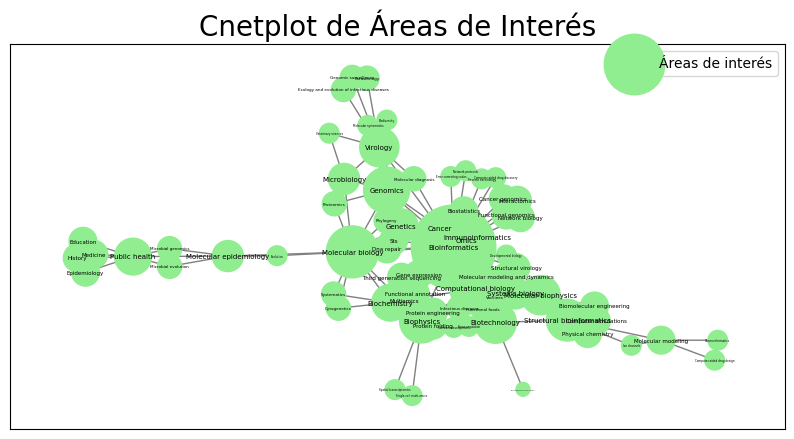

In [181]:
# Crear un gráfico de red
G = nx.Graph()

# Agregar nodos y aristas al gráfico
for idx, row in df.iterrows():
    investigador = row["Researcher"]
    areas_interes = re.split(r',\s*|\sy\s*|\.\s*', row['Interest Areas'])
    for i in range(len(areas_interes)):
        for j in range(i + 1, len(areas_interes)):
            G.add_node(areas_interes[i], type='area')
            G.add_node(areas_interes[j], type='area')
            G.add_edge(areas_interes[i], areas_interes[j])

# Encontrar los componentes conectados y sus tamaños
componentes_conectados = list(nx.connected_components(G))
componentes_tamano = [len(componente) for componente in componentes_conectados]

# Identificar y eliminar los componentes pequeños
umbral_tamano = 5  # Ajusta este umbral según sea necesario
componentes_a_eliminar = [componente for componente in componentes_conectados if len(componente) < umbral_tamano]
print(f"Componentes a eliminar: {componentes_a_eliminar}")

for componente in componentes_a_eliminar:
    G.remove_nodes_from(componente)

# Calcular el tamaño de los nodos y las etiquetas basado en el grado (número de aristas)
node_sizes = [G.degree(node) * 100 for node in G.nodes()]
max_font_size = 5
label_font_sizes = {node: min(G.degree(node), max_font_size) for node in G.nodes()}

# Dibujar el gráfico de red actualizado
pos = nx.spring_layout(G, seed=42)
areas = [node for node, data in G.nodes(data=True) if data['type'] == 'area']

plt.figure(figsize=(10, 5))
nx.draw_networkx_nodes(G, pos, nodelist=areas, node_color='lightgreen', node_size=node_sizes, label='Áreas de interés')
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dibujar etiquetas con tamaños proporcionales
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=label_font_sizes[node], ha='center', va='center')

plt.legend(scatterpoints=1)
plt.title('Cnetplot de Áreas de Interés', fontsize=20)  # Aumentar el tamaño de la fuente del título

# Guardar la imagen
# nombre_imagen = '/content/cnetplot_areas_interes.png'
# plt.savefig(nombre_imagen, format='png')
plt.show()  

In [183]:
from pyvis.network import Network

viznet = Network(notebook=True)

viznet.from_nx(G)

# viznet.show_buttons(filter_=['nodes', 'edges', 'physics'])

for node in viznet.nodes:
    node['Researcher'] = ""
    for idx, row in df.iterrows():
        if node["label"] in row['Interest Areas']:
            node["Researcher"] += row['Researcher'] + "\n"

    node['title'] = node['Researcher']

    # Set size of the node based on the degree
    node['size'] = G.degree(node['label']) * 4
    node['color'] = "lightgreen"

for edge in viznet.edges:
    edge['color'] = "gray"

viznet.show("network.html")

network.html


In [85]:
for node in viznet.nodes:
    print(node)
    # for idx, row in df.iterrows():
    #     if node["label"] in row['Interest Areas']:
    #         print(row['Researcher'])

{'color': '#97c2fc', 'type': 'area', 'size': 10, 'id': 'Molecular biology', 'label': 'Molecular biology', 'shape': 'dot', 'Researcher': 'Omar Caceres\nVictor Jiménez-Vásquez, MSc.\nMichelle C. Chirinos-Arias, Ph.D.\nDan Erick Vivas Ruiz\nPablo Sergio Ramirez Roca\nCleidy Mirela Osorio Mogollon\n', 'title': 'Omar Caceres\nVictor Jiménez-Vásquez, MSc.\nMichelle C. Chirinos-Arias, Ph.D.\nDan Erick Vivas Ruiz\nPablo Sergio Ramirez Roca\nCleidy Mirela Osorio Mogollon\n'}
{'color': '#97c2fc', 'type': 'area', 'size': 10, 'id': 'Genomics', 'label': 'Genomics', 'shape': 'dot', 'Researcher': 'Omar Caceres\nPablo Sergio Ramirez Roca\nLuis Tataje-Lavanda\nMartha S. Calderon\nC. Daniela Robles-Espinoza\nAlejandra Medina-Rivera\n', 'title': 'Omar Caceres\nPablo Sergio Ramirez Roca\nLuis Tataje-Lavanda\nMartha S. Calderon\nC. Daniela Robles-Espinoza\nAlejandra Medina-Rivera\n'}
{'color': '#97c2fc', 'type': 'area', 'size': 10, 'id': 'Bioinformatics', 'label': 'Bioinformatics', 'shape': 'dot', 'Researc